In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

In [3]:
seed = 1234
np.random.seed(seed)

Nburst = 10#7000
tmin = 0
tmax = 64 #14


Fs = 1000. # sampling rate
deltaT = 1./Fs

burst_duration_th = deltaT*64#*20
enhanced_duration = 10

N = np.int(tmax/deltaT)
t = np.linspace(tmin, tmax, N+1)

duty_cycle = burst_duration_th*Nburst/t[-1]*enhanced_duration

print(Fs, deltaT, N, burst_duration_th*enhanced_duration)#, t)
print(duty_cycle)

1000.0 0.001 64000 0.64
0.1


In [4]:
from scipy.stats import loguniform

np.random.seed(seed)
burst_time = np.sort(np.random.uniform(0, tmax, Nburst))
#print(burst_time)

data = np.zeros(len(t))
yes_signal = np.array([t[t>burst][0] for burst in burst_time])

burst_durations = burst_duration_th*np.random.poisson(enhanced_duration, size=Nburst)

for yes, burst_duration in zip(yes_signal, burst_durations):
    
    #data[t==yes] = np.random.normal(loc=0.0, scale = 1.0)
    #burst_duration = burst_duration_th*np.random.poisson(enhanced_duration)
    yes_flag = (t>=yes) & (t<= yes+burst_duration)#*np.random.poisson(10))
    data[yes_flag] += np.random.normal(loc=0.0, scale = 1.0, size = len(t[yes_flag]))*np.sin(t[yes_flag]*np.random.uniform(0,10))/(np.random.uniform(0.2,1))#*np.sin(t[yes_flag]*np.random.uniform(0,10))
    #data[yes_flag] += np.random.normal(loc=0.0, scale = 1.0, size = len(t[yes_flag]))/(np.random.uniform(0.1,10, size = len(t[yes_flag])))*np.sin(t[yes_flag]*np.random.uniform(0,10))
    
delta_t_avg = np.mean([yes_signal[i+1]-yes_signal[i] for i in range(0, len(yes_signal)-1)])
time_elapsed_avg = np.mean([burst_time[i+1]-burst_time[i] for i in range(0, len(burst_time)-1)])
burst_duration_avg = np.mean(burst_durations)

#print(burst_time, yes_signal)
print(duty_cycle, t[-1]/Nburst, delta_t_avg, time_elapsed_avg, burst_duration_avg/delta_t_avg, burst_duration_avg/time_elapsed_avg)

0.1 6.4 5.451444444444444 5.451519312389781 0.11740007745144002 0.11739846514813931


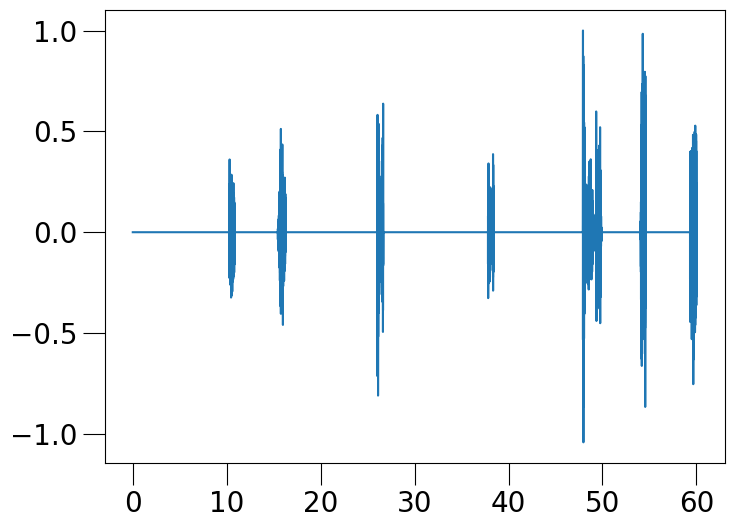

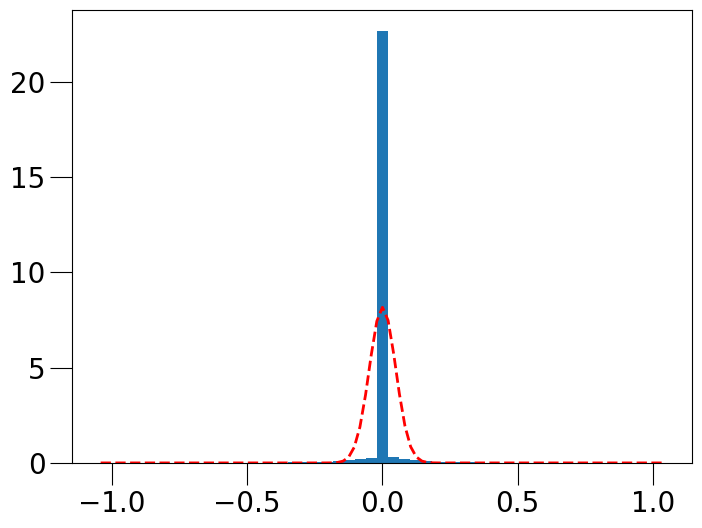

In [5]:
physical_times = (t>=2)&(t<=tmax-2)
data/=np.max(data)

plt.plot(t[physical_times]-2, data[physical_times])
plt.show()
plt.close()


mu, sigma = norm.fit(data[physical_times])
n, bins, patches =plt.hist(data[physical_times], density = True, bins = 50)
xx = np.linspace(bins[0], -bins[0], 101)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r--', linewidth=2)

plt.show()
plt.close()

In [6]:
print(np.random.poisson(10, size =100))

[17 15  6  8  7  6 13  6 11  9  4  8 13  8  9  9  5 12 11 13  7 13 20  5
 12  6  8  8 11  9  8  3  9 13 15 10  7 12  6  7 12 15 18 20 16 11 19  7
  7 10  7 10  6 14 14  3  7  3  6 12  8 10 10  9 12  6  7  6 11 11 17 12
 14 10 12 14 12 14 15  6 13 11  7 16 11 17 16  9 11 11 12 11  7  9  6 11
 13 12 10  7]


In [7]:
def simulate_data_duty_cycle(Nburst = 10, tmin = 0, tmax = 64, Fs = 1000., burst_duration_dt_units=64, enhanced_duration=10, seed = None):
    
    np.random.seed(seed)
    
    deltaT = 1./Fs

    burst_duration_th = deltaT*burst_duration_dt_units

    N = np.int(tmax/deltaT)
    t = np.linspace(tmin, tmax, N+1)

    duty_cycle = burst_duration_th*Nburst/t[-1]*enhanced_duration
    print(f"N_burst: {Nburst}")
    print(f"Theoretical average duration: {burst_duration_th*enhanced_duration}s")
    print(f"Theoretical average silence: {t[-1]/Nburst}s")
    print(f"Theoretical duty cycle: {duty_cycle}")
    
    burst_time = np.sort(np.random.uniform(0, tmax, Nburst))
    
    data = np.zeros(len(t))
    yes_signal = np.array([t[t>burst][0] for burst in burst_time])

    burst_durations = burst_duration_th*np.random.poisson(enhanced_duration, size=Nburst)

    for yes, burst_duration in zip(yes_signal, burst_durations):
    
        yes_flag = (t>=yes) & (t<= yes+burst_duration)#*np.random.poisson(10))
        data[yes_flag] += np.random.normal(loc=0.0, scale = 1.0, size = len(t[yes_flag]))*np.sin(t[yes_flag]*np.random.uniform(0,10))/(np.random.uniform(0.2,1))#*np.sin(t[yes_flag]*np.random.uniform(0,10))

        delta_t_avg = np.mean([yes_signal[i+1]-yes_signal[i] for i in range(0, len(yes_signal)-1)])
        time_elapsed_avg = np.mean([burst_time[i+1]-burst_time[i] for i in range(0, len(burst_time)-1)])
        burst_duration_avg = np.mean(burst_durations)
    
    print(f"Sample average duration: {burst_duration_avg}s")
    print(f"Sample average silence: {time_elapsed_avg}s")
    print(f"Sample duty cycle: {burst_duration_avg/time_elapsed_avg}")
    
    return (t, data, duty_cycle) 

In [8]:
def plotter(t, data, duty_cycle):
    physical_times = (t>=t[0]+2)&(t<=t[-1]-2)
    data/=np.max(data)

    plt.plot(t[physical_times]-2, data[physical_times], color="black")
    plt.title(r"$\Delta=$"+f"{duty_cycle}")
    plt.xlabel("time (s)")
    plt.ylabel(r"$h/h_{\rm max}$")
    plt.xlim(t[0], t[-1]-4)
    plt.ylim(-1.01, 1.01)
    plt.show()
    plt.close()


    mu, sigma = norm.fit(data[physical_times])
    n, bins, patches =plt.hist(data[physical_times], density = True, bins = 50, color="black")
    xx = np.linspace(bins[0], -bins[0], 101)
    plt.plot(xx, norm.pdf(xx, mu, sigma), 'r--', linewidth=2)
    plt.title(r"$\Delta=$"+f"{duty_cycle}")
    plt.xlabel(r"$h/h_{\rm max}$")
    
    plt.show()
    plt.close()
    
def plotter_from_axes(t, data, duty_cycle, ax_time, ax_histo):
    physical_times = (t>=t[0]+2)&(t<=t[-1]-2)
    data/=np.max(data)
    
    import matplotlib.patches as mpatches
    nan_patch = mpatches.Patch(color="none", label=r"$\Delta=$"+f"{duty_cycle}")

    ax_time.plot(t[physical_times]-2, data[physical_times], color="black")
    #ax_time.set_title(r"$\Delta=$"+f"{duty_cycle}")
    ax_time.set_xlabel("time (s)")
    ax_time.set_ylabel(r"$h/h_{\rm max}$")
    ax_time.set_xlim(t[0], t[-1]-4)
    ax_time.set_ylim(-1.01,1.01)
    

    mu, sigma = norm.fit(data[physical_times])
    n, bins, patches =ax_histo.hist(data[physical_times], density = True, bins = 50, color="black")
    xx = np.linspace(bins[0], -bins[0], 101)
    ax_histo.plot(xx, norm.pdf(xx, mu, sigma), 'r--', linewidth=2)
    #ax_histo.set_title(r"$\Delta=$"+f"{duty_cycle}")
    ax_histo.set_xlabel(r"$h/h_{\rm max}$")
    ax_histo.set_xlim(-1.01,1.01)
    ax_histo.text(0.75, 0.85*np.max(n), r"$\Delta=$"+f"{duty_cycle}",
            ha="center", va="center", size=15,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc="white", ec="black", lw=2))
    
    
    return ax_time, ax_histo

N_burst: 10
Theoretical average duration: 0.64s
Theoretical average silence: 6.4s
Theoretical duty cycle: 0.1
Sample average duration: 0.6400000000000001s
Sample average silence: 5.451519312389781s
Sample duty cycle: 0.11739846514813931


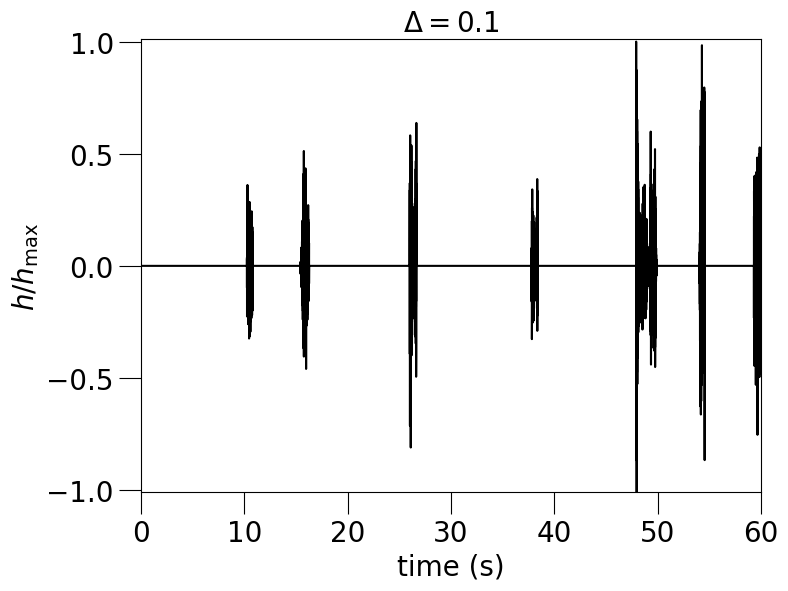

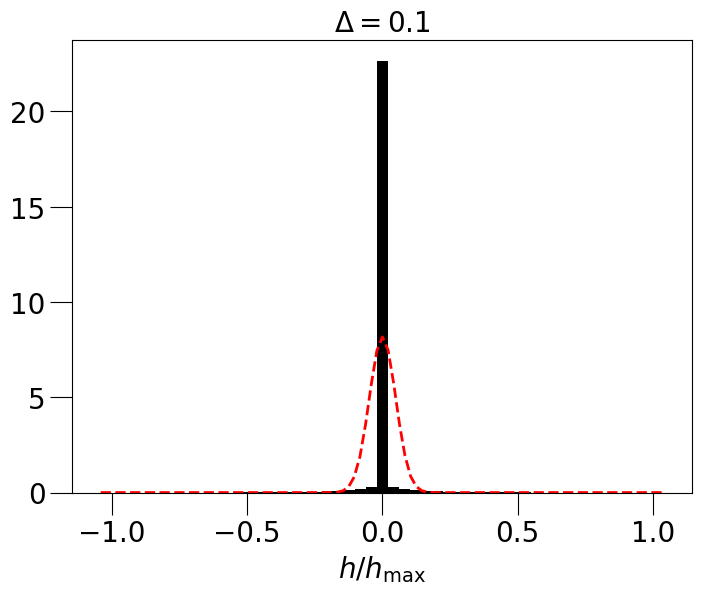

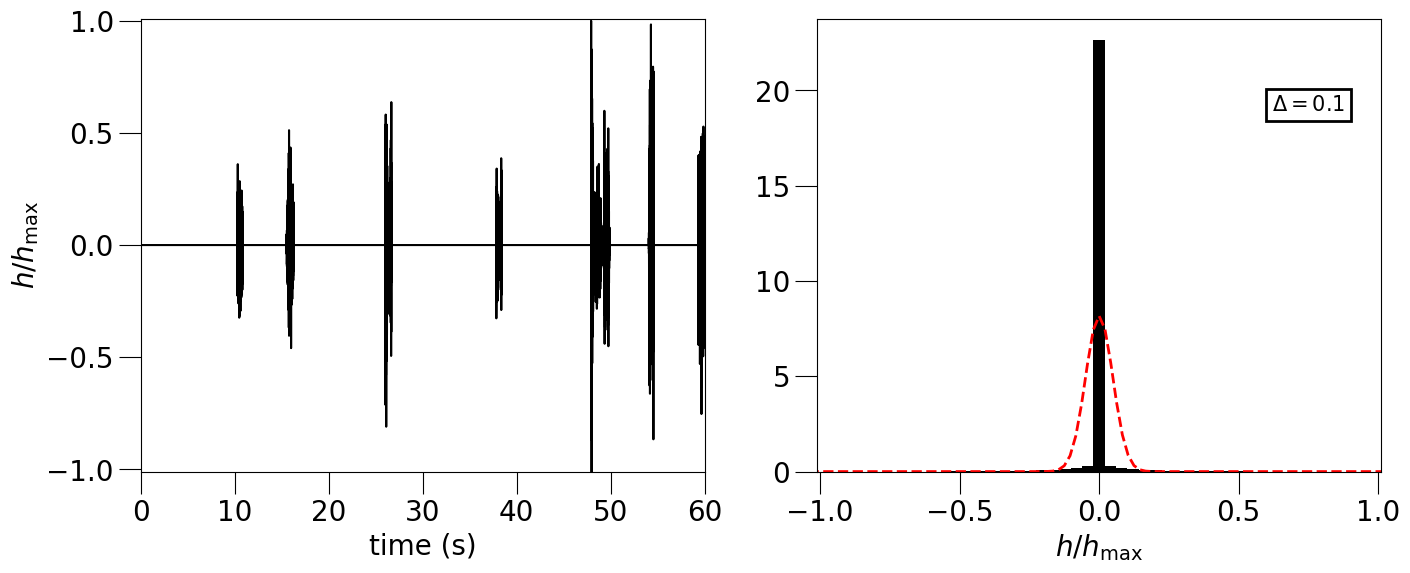

In [9]:
t_default, data_default, duty_cycle_default = simulate_data_duty_cycle(seed = 1234)

plotter(t_default, data_default, duty_cycle_default)

fig, (ax_time, ax_histo) = plt.subplots(nrows = 1, ncols=2, figsize = (16,6))
(ax_time, ax_histo) = plotter_from_axes(t_default, data_default, duty_cycle_default, ax_time, ax_histo)
plt.show()

Generating data with Nburst=10...

N_burst: 10
Theoretical average duration: 0.64s
Theoretical average silence: 6.4s
Theoretical duty cycle: 0.1
Sample average duration: 0.6400000000000001s
Sample average silence: 5.451519312389781s
Sample duty cycle: 0.11739846514813931

Plotting...
Done.

Generating data with Nburst=100...

N_burst: 100
Theoretical average duration: 0.64s
Theoretical average silence: 0.64s
Theoretical duty cycle: 1.0
Sample average duration: 0.6355200000000001s
Sample average silence: 0.6373320078230187s
Sample duty cycle: 0.9971568855780396

Plotting...
Done.

Generating data with Nburst=10000...

N_burst: 10000
Theoretical average duration: 0.64s
Theoretical average silence: 0.0064s
Theoretical duty cycle: 100.0
Sample average duration: 0.6405824000000001s
Sample average silence: 0.006400242030123348s
Sample duty cycle: 100.08721498109573

Plotting...
Done.



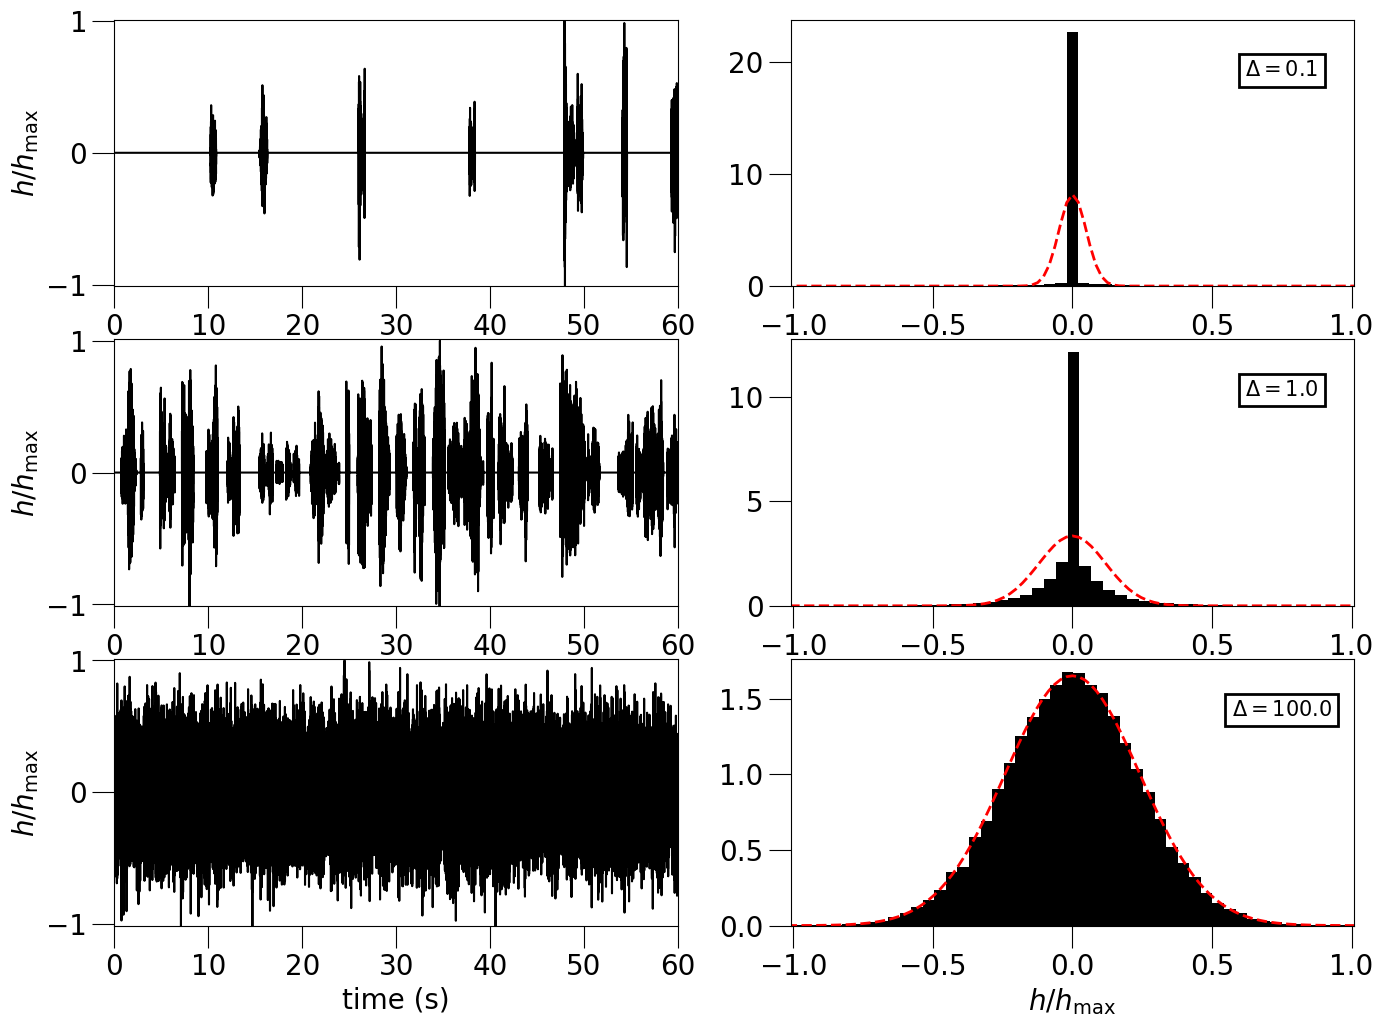

In [10]:
seed = 1234

fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (16,12))

for Nburst, axs, in zip([10, 100,10000], axs):
    print(f"Generating data with Nburst={Nburst}...\n")
    t, data, duty_cycle = simulate_data_duty_cycle(Nburst=Nburst, seed = seed)
    print("\nPlotting...")
    plotter_from_axes(t, data, duty_cycle, axs[0], axs[1])
    print("Done.\n")

plt.savefig("./Duty_cycle.pdf", bbox_inches = "tight")
plt.show()
plt.close()